In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path
import os

In [3]:
average_accuracies = {}

## xLSTM-7b

In [6]:
benchmark_dir = Path("./scripts/benchmark_root/xLSTM-7b/synthetic")
name = benchmark_dir.parent.name
ctx_lengths = [x for x in os.listdir(benchmark_dir)]
joint_table = []

for ctx_length in ctx_lengths:
    print(os.listdir(benchmark_dir / ctx_length / "pred" ))
    data = pd.read_csv(benchmark_dir / ctx_length / "pred" / "summary.csv", header=1)
    data["ctx_length"] = int(ctx_length)
    joint_table.append(data)

joint_table[0]

['niah_multikey_3.jsonl', 'niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv', 'niah_multikey_2.jsonl', 'niah_multivalue.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'qa_1.jsonl']
['niah_single_1.jsonl', 'niah_single_2.jsonl', 'vt.jsonl', 'cwe.jsonl', 'niah_multivalue.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_3.jsonl', 'niah_multiquery.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_multivalue.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'niah_multikey_3.jsonl', 'niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['summary.csv', 'submission.csv', 'niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_

,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,ctx_length
0,Score,75.4,1.6,2.0,3.6,0.0,0.0,2.95,2.1,1.56,0.28,30.27,21.0,22.6,65536
1,Nulls,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,65536


In [5]:
joint_data = pd.concat(joint_table)
joint_data = joint_data[joint_data['Tasks'] != "Nulls"]
joint_data = joint_data.set_index("ctx_length")
joint_data_avg = joint_data[[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]]
joint_data_avg = joint_data_avg.values.astype('float32').mean(axis=1)
print(joint_data_avg)
joint_data['avg'] = joint_data_avg

average_accuracies[name] = joint_data_avg

joint_data = joint_data.sort_index()
joint_data

[12.566154 18.519999 30.346153 42.864616 11.346154 54.401535]


,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,avg
ctx_length,,,,,,,,,,,,,,,
4096,Score,100.0,98.0,97.0,39.0,7.6,0.0,85.0,88.85,14.12,36.32,64.73,39.8,36.8,54.401535
8192,Score,100.0,84.4,67.6,32.8,2.0,0.0,64.8,62.0,4.64,13.0,70.0,27.2,28.8,42.864616
16384,Score,100.0,50.0,39.0,22.0,0.6,0.0,27.05,23.8,2.0,3.38,75.87,25.4,25.4,30.346153
32768,Score,99.8,9.0,8.4,9.4,0.2,0.0,6.0,6.15,0.4,0.34,53.27,22.4,25.4,18.519999
65536,Score,75.4,1.6,2.0,3.6,0.0,0.0,2.95,2.1,1.56,0.28,30.27,21.0,22.6,12.566154
131072,Score,60.6,2.0,2.2,2.4,0.0,0.0,2.35,2.1,4.88,0.1,26.87,21.2,22.8,11.346154


In [4]:
[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]

['niah_single_1',
 'niah_single_2',
 'niah_single_3',
 'niah_multikey_1',
 'niah_multikey_2',
 'niah_multikey_3',
 'niah_multivalue',
 'niah_multiquery',
 'vt',
 'cwe',
 'fwe',
 'qa_1',
 'qa_2',
 'avg']

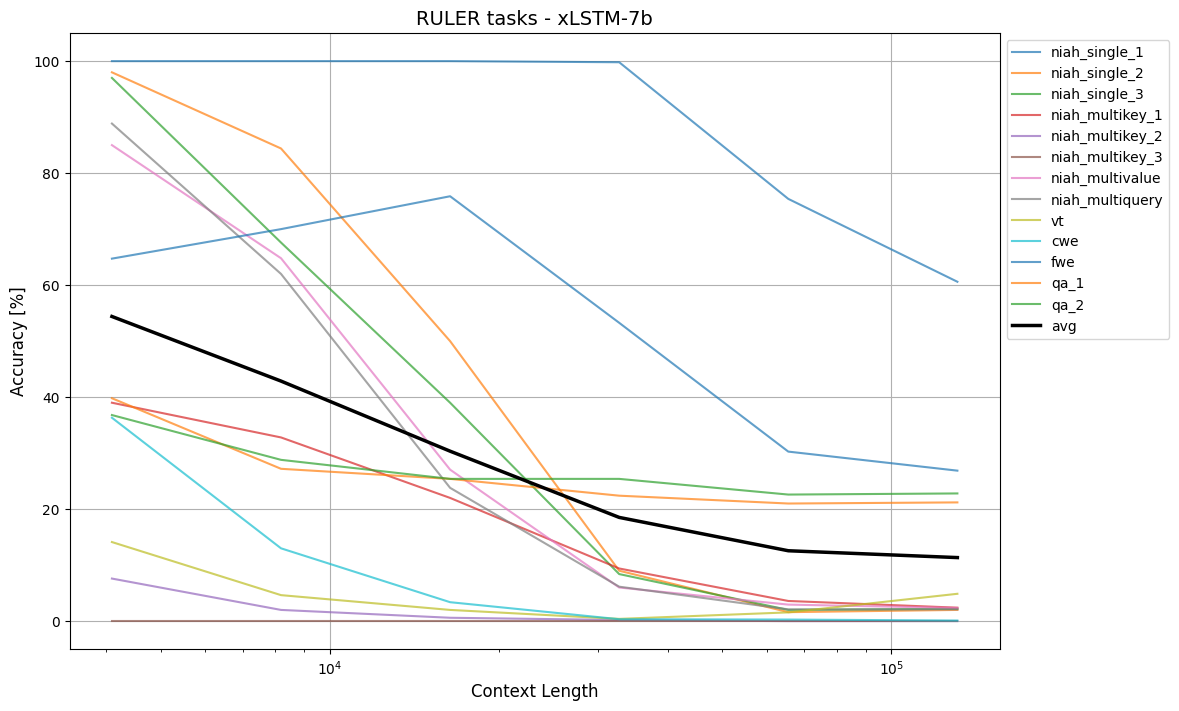

In [5]:
from matplotlib import pyplot as plt
df = joint_data
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        ax.plot(df.index, df[col], label=col, alpha=0.7)

# Plot "avg" with a bold line
ax.plot(df.index, df['avg'], label='avg', linewidth=2.5, color='black')

# Add labels, legend, and grid
ax.set_xlabel('Context Length', fontsize=12)
ax.set_ylabel('Accuracy [%]', fontsize=12)
ax.set_title('RULER tasks - xLSTM-7b', fontsize=14)
ax.set_xscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)

fig.show()

## Falcon-Mamba-7B

In [7]:
benchmark_dir = Path("./scripts/benchmark_root/falcon-mamba-7b/synthetic")
name = benchmark_dir.parent.name
ctx_lengths = [x for x in os.listdir(benchmark_dir)]
joint_table = []

for ctx_length in ctx_lengths:
    print(os.listdir(benchmark_dir / ctx_length / "pred" ))
    data = pd.read_csv(benchmark_dir / ctx_length / "pred" / "summary.csv", header=1)
    data["ctx_length"] = int(ctx_length)
    joint_table.append(data)

joint_table[0]

['niah_single_1.jsonl', 'summary-niah_single_1.csv', 'submission.csv', 'qa_2.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'cwe.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'niah_single_3.jsonl', 'niah_multikey_2.jsonl', 'niah_single_2.jsonl', 'summary.csv']
['niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_single_1.jsonl', 'niah_single_3.jsonl', 'niah_single_2.jsonl', 'niah_multikey_1.js

,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,ctx_length
0,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131072
1,Nulls,274/500,26/500,45/500,27/500,346/500,16/500,19/500,74/500,3/500,494/500,25/500,401/500,498/500,131072


In [8]:
joint_data = pd.concat(joint_table)
joint_data = joint_data[joint_data['Tasks'] != "Nulls"]
joint_data = joint_data.set_index("ctx_length")
joint_data_avg = joint_data[[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]]
joint_data_avg = joint_data_avg.values.astype('float32').mean(axis=1)
print(joint_data_avg)
joint_data['avg'] = joint_data_avg
joint_data = joint_data.sort_index()
joint_data

[0.0000000e+00 2.1392307e+01 3.4522305e+01 5.6153849e-02 5.9469228e+00
 6.0090778e+01]


,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,avg
ctx_length,,,,,,,,,,,,,,,
4096,Score,100.0,95.6,64.8,43.4,2.6,0.0,75.45,83.5,76.64,74.06,82.53,46.4,36.2,60.090778
8192,Score,100.0,40.2,21.2,20.4,0.4,0.0,25.1,28.7,43.96,39.96,71.47,30.0,27.4,34.522305
16384,Score,100.0,7.4,5.2,7.6,0.0,0.0,4.6,4.8,16.2,10.7,64.8,30.6,26.2,21.392307
32768,Score,1.6,1.8,0.0,3.0,0.0,0.0,2.35,0.45,0.0,0.64,21.47,22.0,24.0,5.946923
65536,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.13,0.2,0.4,0.056154
131072,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [9]:
[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]

['niah_single_1',
 'niah_single_2',
 'niah_single_3',
 'niah_multikey_1',
 'niah_multikey_2',
 'niah_multikey_3',
 'niah_multivalue',
 'niah_multiquery',
 'vt',
 'cwe',
 'fwe',
 'qa_1',
 'qa_2',
 'avg']

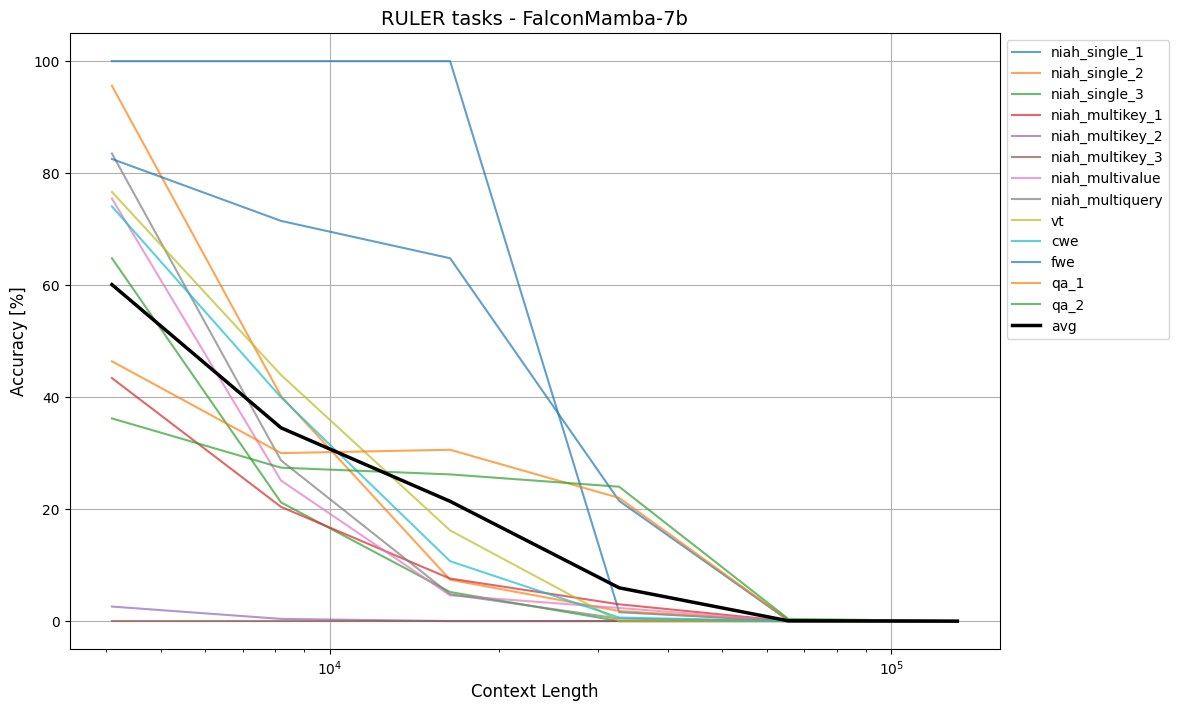

In [10]:
from matplotlib import pyplot as plt
df = joint_data
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot
fix, ax = plt.subplots(figsize=(12, 8))
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        ax.plot(df.index, df[col], label=col, alpha=0.7)

# Plot "avg" with a bold line
ax.plot(df.index, df['avg'], label='avg', linewidth=2.5, color='black')

# Add labels, legend, and grid
ax.set_xlabel('Context Length', fontsize=12)
ax.set_ylabel('Accuracy [%]', fontsize=12)
ax.set_title('RULER tasks - FalconMamba-7b', fontsize=14)
ax.set_xscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)


## Llama-3.1-8b

In [11]:
benchmark_dir = Path("./scripts/benchmark_root/llama3.1-8b/synthetic")
name = benchmark_dir.parent.name
ctx_lengths = [x for x in os.listdir(benchmark_dir)]
joint_table = []

for ctx_length in ctx_lengths:
    print(os.listdir(benchmark_dir / ctx_length / "pred" ))
    data = pd.read_csv(benchmark_dir / ctx_length / "pred" / "summary.csv", header=1)
    data["ctx_length"] = int(ctx_length)
    joint_table.append(data)

joint_table[0]

['niah_multiquery.jsonl', 'niah_single_3.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_1.jsonl', 'niah_single_2.jsonl', 'niah_single_1.jsonl', 'niah_multivalue.jsonl', 'niah_multikey_3.jsonl', 'vt.jsonl', 'cwe.jsonl', 'qa_2.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'summary.csv', 'submission.csv']
['niah_single_3.jsonl', 'niah_single_2.jsonl', 'niah_single_1.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_3.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'niah_multivalue.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl'

,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,ctx_length
0,Score,100.0,100.0,97.2,93.2,37.0,42.0,78.6,85.9,56.28,0.32,78.13,49.2,36.6,131072
1,Nulls,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,1/500,0/500,0/500,0/500,1/500,131072


In [12]:
joint_data = pd.concat(joint_table)
joint_data = joint_data[joint_data['Tasks'] != "Nulls"]
joint_data = joint_data.set_index("ctx_length")
joint_data_avg = joint_data[[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]]
joint_data_avg = joint_data_avg.values.astype('float32').mean(axis=1)
print(joint_data_avg)
joint_data['avg'] = joint_data_avg
joint_data = joint_data.sort_index()
joint_data

[65.72539  79.72462  87.956924 90.78615  91.57539  93.43538 ]


,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,avg
ctx_length,,,,,,,,,,,,,,,
4096,Score,100.0,100.0,99.8,99.8,99.8,99.6,99.15,99.8,99.88,99.56,92.47,72.6,52.2,93.435379
8192,Score,100.0,100.0,99.8,99.0,100.0,99.4,94.95,99.65,99.28,97.4,85.4,64.4,51.2,91.575394
16384,Score,100.0,100.0,99.2,99.2,99.2,99.0,96.5,98.95,99.68,89.02,94.27,57.0,48.2,90.786148
32768,Score,100.0,100.0,96.2,97.4,97.8,93.2,99.25,99.2,99.32,64.0,93.47,55.2,48.4,87.956924
65536,Score,100.0,100.0,97.0,97.4,86.6,90.4,96.05,96.3,89.28,4.06,88.13,49.2,42.0,79.724617
131072,Score,100.0,100.0,97.2,93.2,37.0,42.0,78.6,85.9,56.28,0.32,78.13,49.2,36.6,65.725388


In [13]:
[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]

['niah_single_1',
 'niah_single_2',
 'niah_single_3',
 'niah_multikey_1',
 'niah_multikey_2',
 'niah_multikey_3',
 'niah_multivalue',
 'niah_multiquery',
 'vt',
 'cwe',
 'fwe',
 'qa_1',
 'qa_2',
 'avg']

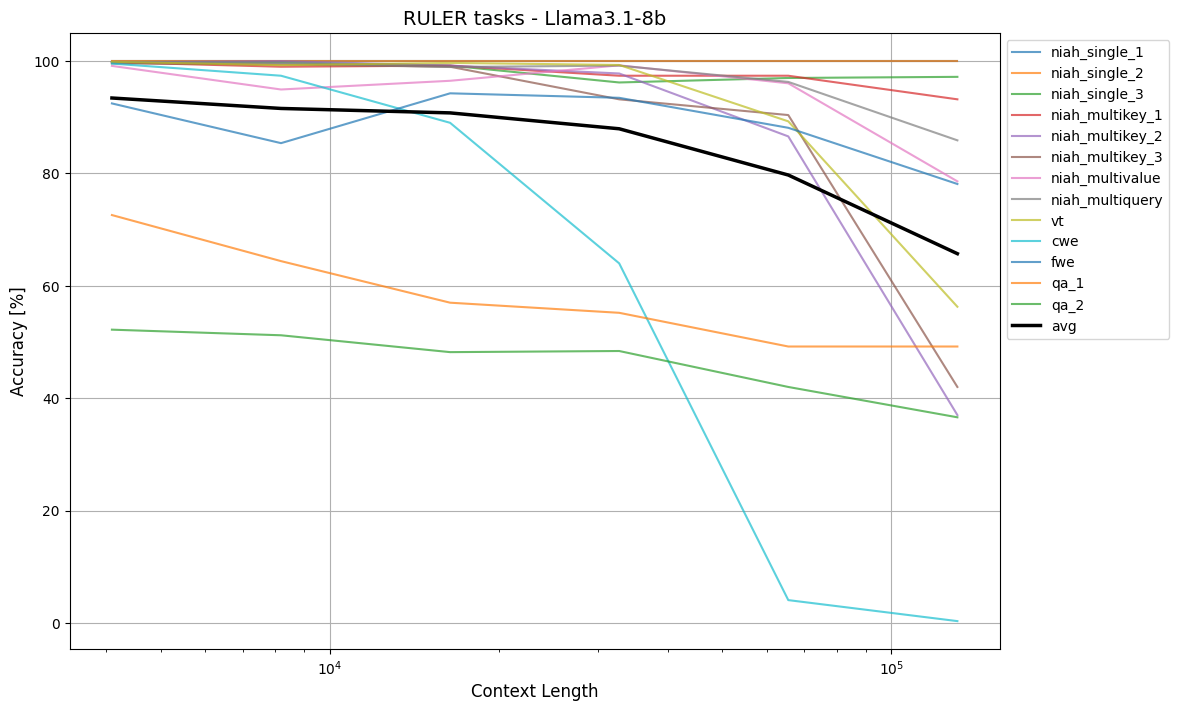

In [15]:
from matplotlib import pyplot as plt
df = joint_data
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot
fix, ax = plt.subplots(figsize=(12, 8))
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        ax.plot(df.index, df[col], label=col, alpha=0.7)

# Plot "avg" with a bold line
ax.plot(df.index, df['avg'], label='avg', linewidth=2.5, color='black')

# Add labels, legend, and grid
ax.set_xlabel('Context Length', fontsize=12)
ax.set_ylabel('Accuracy [%]', fontsize=12)
ax.set_title('RULER tasks - Llama3.1-8b', fontsize=14)
ax.set_xscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)


## Llama2-7b

In [16]:
benchmark_dir = Path("./scripts/benchmark_root/llama-2-7b/synthetic")
name = benchmark_dir.parent.name
ctx_lengths = [x for x in os.listdir(benchmark_dir)]
joint_table = []

for ctx_length in ctx_lengths:
    print(os.listdir(benchmark_dir / ctx_length / "pred" ))
    data = pd.read_csv(benchmark_dir / ctx_length / "pred" / "summary.csv", header=1)
    data["ctx_length"] = int(ctx_length)
    joint_table.append(data)

joint_table[0]

['niah_single_1.jsonl', 'niah_multikey_2.jsonl', 'niah_single_2.jsonl', 'niah_multikey_1.jsonl', 'niah_single_3.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_multikey_1.jsonl', 'niah_single_3.jsonl', 'niah_single_2.jsonl', 'niah_multivalue.jsonl', 'niah_multikey_3.jsonl', 'niah_single_1.jsonl', 'niah_multikey_2.jsonl', 'fwe.jsonl', 'cwe.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'qa_2.jsonl', 'qa_1.jsonl', 'summary.csv', 'submission.csv']
['niah_multiquery.jsonl', 'fwe.jsonl', 'qa_2.jsonl', 'qa_1.jsonl', 'niah_multikey_3.jsonl', 'vt.jsonl', 'cwe.jsonl', 'niah_multikey_2.jsonl', 'niah_multivalue.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_single_2.jsonl', 'niah_single_1.jsonl', 'summary.csv', 'submission.csv']
['fwe.jsonl', 'cwe.jsonl', 'qa_1.jsonl', 'niah_single_2.jsonl', 'niah_single_1.jsonl', 'niah_multivalue.jsonl', 'niah_

,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,ctx_length
0,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131072
1,Nulls,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,131072


In [17]:
joint_data = pd.concat(joint_table)
joint_data = joint_data[joint_data['Tasks'] != "Nulls"]
joint_data = joint_data.set_index("ctx_length")
joint_data_avg = joint_data[[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]]
joint_data_avg = joint_data_avg.values.astype('float32').mean(axis=1)
print(joint_data_avg)
joint_data['avg'] = joint_data_avg
joint_data = joint_data.sort_index()
joint_data

[ 0.       0.       0.       0.       0.      80.92077]


,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,avg
ctx_length,,,,,,,,,,,,,,,
4096,Score,100.0,100.0,97.0,99.2,85.6,65.4,95.0,94.15,62.28,72.94,76.8,60.2,43.4,80.920769
8192,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
16384,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
32768,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
65536,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
131072,Score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [18]:
[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]

['niah_single_1',
 'niah_single_2',
 'niah_single_3',
 'niah_multikey_1',
 'niah_multikey_2',
 'niah_multikey_3',
 'niah_multivalue',
 'niah_multiquery',
 'vt',
 'cwe',
 'fwe',
 'qa_1',
 'qa_2',
 'avg']

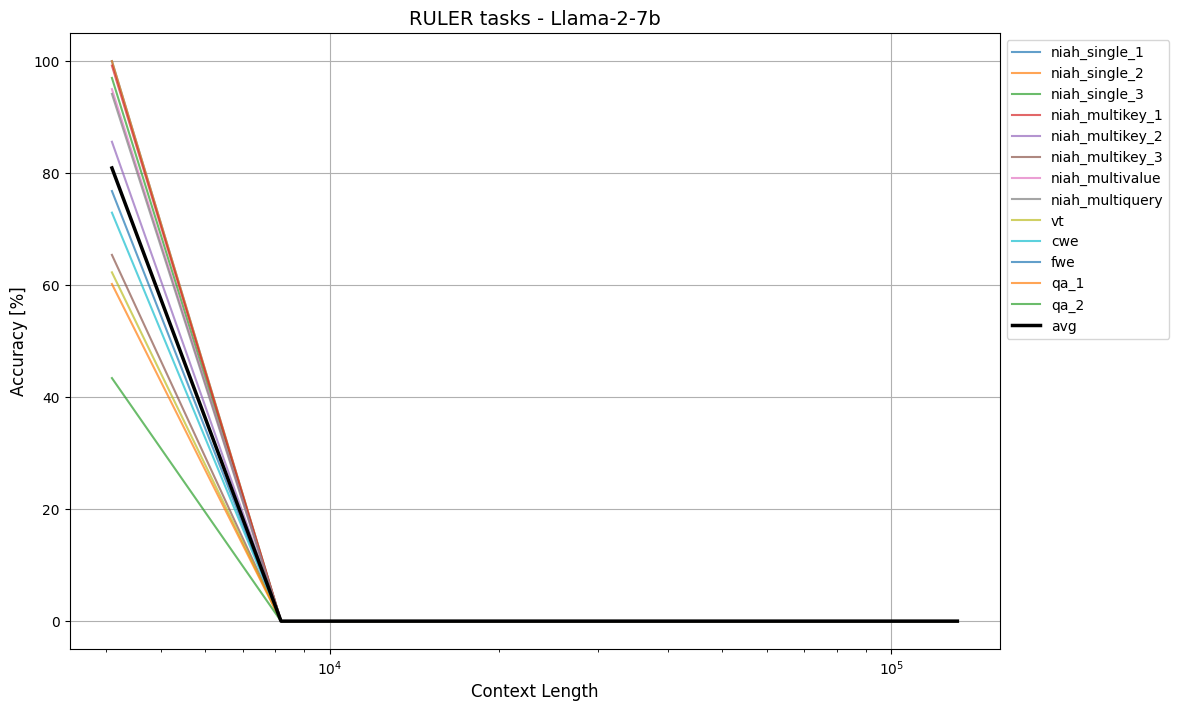

In [20]:
from matplotlib import pyplot as plt
df = joint_data
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot
fix, ax = plt.subplots(figsize=(12, 8))
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        ax.plot(df.index, df[col], label=col, alpha=0.7)

# Plot "avg" with a bold line
ax.plot(df.index, df['avg'], label='avg', linewidth=2.5, color='black')

# Add labels, legend, and grid
ax.set_xlabel('Context Length', fontsize=12)
ax.set_ylabel('Accuracy [%]', fontsize=12)
ax.set_title('RULER tasks - Llama-2-7b', fontsize=14)
ax.set_xscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)


## xLSTM-7B longctx

In [2]:
benchmark_dir = Path("./scripts/benchmark_root/xLSTM-7b-longctx/synthetic")
name = benchmark_dir.parent.name
ctx_lengths = [x for x in os.listdir(benchmark_dir)]
joint_table = []

for ctx_length in ctx_lengths:
    print(os.listdir(benchmark_dir / ctx_length / "pred" ))
    data = pd.read_csv(benchmark_dir / ctx_length / "pred" / "summary.csv", header=1)
    data["ctx_length"] = int(ctx_length)
    joint_table.append(data)

joint_table[0]

['cwe.jsonl', 'niah_single_2.jsonl', 'niah_single_1.jsonl', 'niah_single_3.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'niah_multikey_1.jsonl', 'vt.jsonl', 'fwe.jsonl', 'niah_multivalue.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_3.jsonl', 'niah_multiquery.jsonl', 'summary.csv', 'submission.csv']
['fwe.jsonl', 'niah_single_3.jsonl', 'qa_1.jsonl', 'cwe.jsonl', 'vt.jsonl', 'niah_single_2.jsonl', 'niah_multiquery.jsonl', 'niah_single_1.jsonl', 'niah_multikey_2.jsonl', 'qa_2.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'niah_multikey_1.jsonl', 'summary.csv', 'submission.csv']
['niah_multikey_2.jsonl', 'niah_multikey_1.jsonl', 'niah_single_2.jsonl', 'niah_multiquery.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'niah_single_3.jsonl', 'vt.jsonl', 'niah_single_1.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl'

,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,ctx_length
0,Score,100.0,17.4,16.0,17.6,0.0,0.0,15.3,15.6,17.68,0.32,52.33,24.6,23.0,65536
1,Nulls,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,65536


In [3]:
joint_data = pd.concat(joint_table)
joint_data = joint_data[joint_data['Tasks'] != "Nulls"]
joint_data = joint_data.set_index("ctx_length")
joint_data_avg = joint_data[[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]]
joint_data_avg = joint_data_avg.values.astype('float32').mean(axis=1)
print(joint_data_avg)
joint_data['avg'] = joint_data_avg
joint_data = joint_data.sort_index()
joint_data

[23.063847 25.590769 42.06231  48.25923  59.60693  20.429996]


,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,avg
ctx_length,,,,,,,,,,,,,,,
4096,Score,100.0,100.0,98.2,50.6,24.6,0.2,88.1,86.25,24.56,33.78,72.4,53.0,43.2,59.606930
8192,Score,99.8,95.8,81.0,38.6,3.6,0.0,73.15,72.3,6.16,17.76,68.2,32.6,38.4,48.259232
16384,Score,100.0,72.0,68.0,33.6,1.2,0.0,58.2,56.8,1.08,9.46,82.87,30.4,33.2,42.062309
32768,Score,100.0,22.6,23.0,18.6,0.4,0.0,17.4,15.85,5.76,0.2,75.87,23.6,29.4,25.590769
65536,Score,100.0,17.4,16.0,17.6,0.0,0.0,15.3,15.6,17.68,0.32,52.33,24.6,23.0,23.063847
131072,Score,100.0,8.2,11.4,7.6,0.0,0.0,7.4,8.05,31.16,0.18,47.4,21.2,23.0,20.429996


In [4]:
[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]

['niah_single_1',
 'niah_single_2',
 'niah_single_3',
 'niah_multikey_1',
 'niah_multikey_2',
 'niah_multikey_3',
 'niah_multivalue',
 'niah_multiquery',
 'vt',
 'cwe',
 'fwe',
 'qa_1',
 'qa_2',
 'avg']

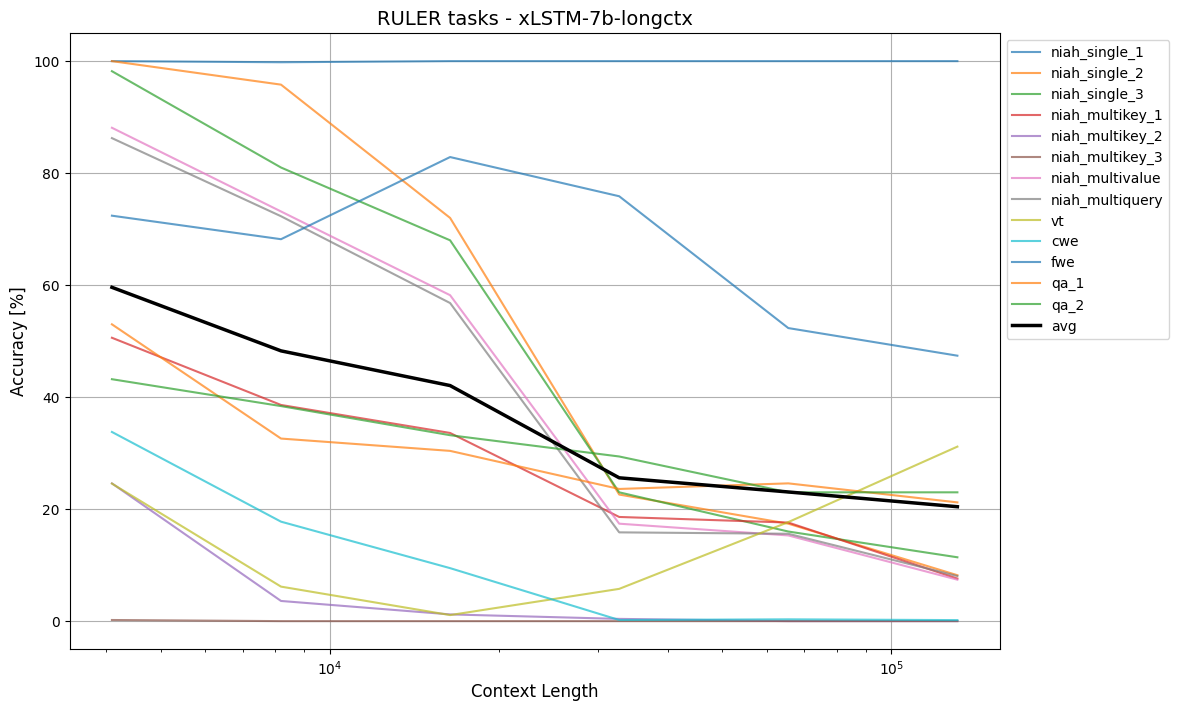

In [6]:
from matplotlib import pyplot as plt
df = joint_data
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot
fix, ax = plt.subplots(figsize=(12, 8))
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        ax.plot(df.index, df[col], label=col, alpha=0.7)

# Plot "avg" with a bold line
ax.plot(df.index, df['avg'], label='avg', linewidth=2.5, color='black')

# Add labels, legend, and grid
ax.set_xlabel('Context Length', fontsize=12)
ax.set_ylabel('Accuracy [%]', fontsize=12)
ax.set_title('RULER tasks - xLSTM-7b-longctx', fontsize=14)
ax.set_xscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)


# xLSTM7B-short-nh4

In [23]:
benchmark_dir = Path("./scripts/benchmark_root/xLSTM-7b-short-nh4/synthetic")
name = benchmark_dir.parent.name
ctx_lengths = [x for x in os.listdir(benchmark_dir)]
joint_table = []

for ctx_length in ctx_lengths:
    print(os.listdir(benchmark_dir / ctx_length / "pred" ))
    data = pd.read_csv(benchmark_dir / ctx_length / "pred" / "summary.csv", header=1)
    data["ctx_length"] = int(ctx_length)
    joint_table.append(data)

joint_table[0]

['niah_multivalue.jsonl', 'qa_2.jsonl', 'qa_1.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'vt.jsonl', 'niah_multikey_3.jsonl', 'niah_multikey_2.jsonl', 'niah_single_1.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multiquery.jsonl', 'niah_single_2.jsonl', 'summary.csv', 'submission.csv']
['niah_single_3.jsonl', 'niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_single_2.jsonl', 'niah_single_1.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl'

,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,ctx_length
0,Score,15.2,3.6,3.2,4.0,0.0,0.0,2.4,2.15,0.36,0.18,1.6,12.4,17.6,131072
1,Nulls,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,131072


In [24]:
joint_data = pd.concat(joint_table)
joint_data = joint_data[joint_data['Tasks'] != "Nulls"]
joint_data = joint_data.set_index("ctx_length")
joint_data_avg = joint_data[[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]]
joint_data_avg = joint_data_avg.values.astype('float32').mean(axis=1)
print(joint_data_avg)
joint_data['avg'] = joint_data_avg
joint_data = joint_data.sort_index()
joint_data

[ 4.822307   9.4800005 13.68154   17.666924  24.349998  32.364616 ]


,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,avg
ctx_length,,,,,,,,,,,,,,,
4096,Score,100.0,98.0,84.6,32.2,0.8,0.0,2.4,1.4,4.2,13.14,23.4,30.6,30.0,32.364616
8192,Score,100.0,51.2,49.6,32.6,0.0,0.0,2.25,4.35,7.88,4.2,15.67,22.0,26.8,24.349998
16384,Score,99.6,29.8,16.0,18.2,0.0,0.0,2.1,3.0,12.72,0.18,7.47,18.6,22.0,17.666924
32768,Score,91.2,10.0,8.0,9.4,0.0,0.0,2.5,2.75,18.32,0.16,2.13,12.8,20.6,13.681540
65536,Score,55.2,10.0,5.2,9.4,0.0,0.0,2.65,1.7,6.4,0.22,2.87,11.4,18.2,9.480000
131072,Score,15.2,3.6,3.2,4.0,0.0,0.0,2.4,2.15,0.36,0.18,1.6,12.4,17.6,4.822307


In [25]:
[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]

['niah_single_1',
 'niah_single_2',
 'niah_single_3',
 'niah_multikey_1',
 'niah_multikey_2',
 'niah_multikey_3',
 'niah_multivalue',
 'niah_multiquery',
 'vt',
 'cwe',
 'fwe',
 'qa_1',
 'qa_2',
 'avg']

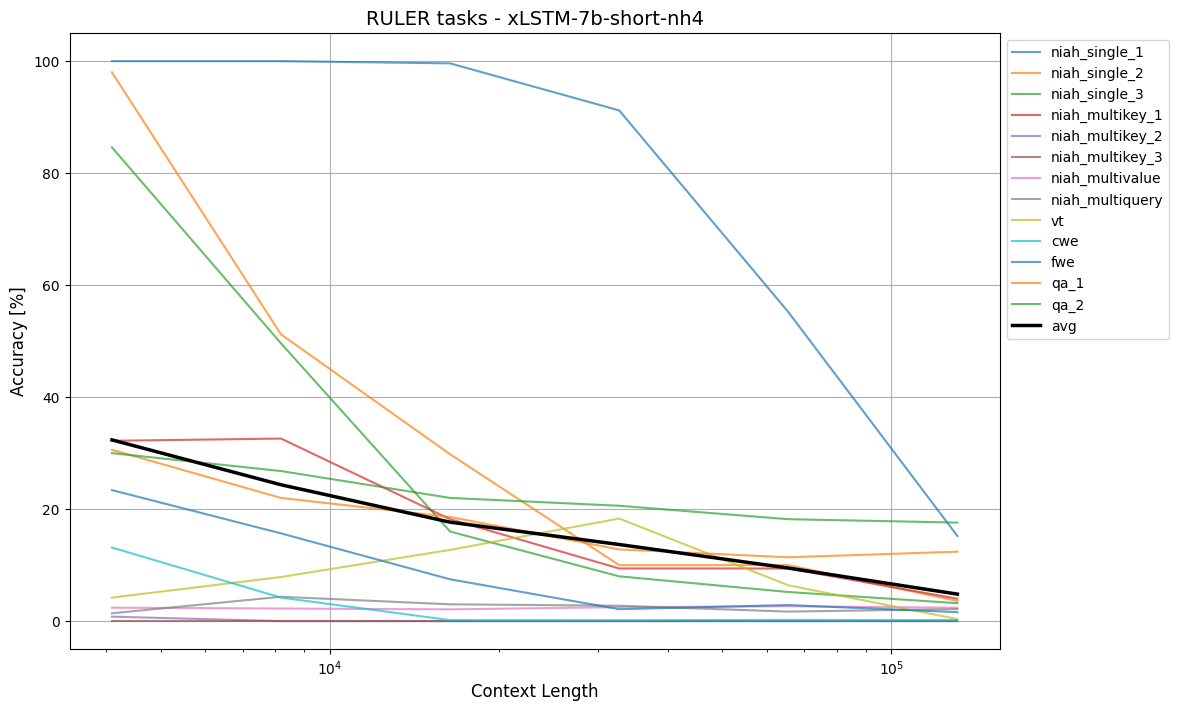

In [26]:
from matplotlib import pyplot as plt
df = joint_data
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot
fix, ax = plt.subplots(figsize=(12, 8))
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        ax.plot(df.index, df[col], label=col, alpha=0.7)

# Plot "avg" with a bold line
ax.plot(df.index, df['avg'], label='avg', linewidth=2.5, color='black')

# Add labels, legend, and grid
ax.set_xlabel('Context Length', fontsize=12)
ax.set_ylabel('Accuracy [%]', fontsize=12)
ax.set_title('RULER tasks - xLSTM-7b-short-nh4', fontsize=14)
ax.set_xscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)


### xLSTM-7b-short-nh8

In [27]:
benchmark_dir = Path("./scripts/benchmark_root/xLSTM-7b-short-nh8/synthetic")
name = benchmark_dir.parent.name
ctx_lengths = [x for x in os.listdir(benchmark_dir)]
joint_table = []

for ctx_length in ctx_lengths:
    print(os.listdir(benchmark_dir / ctx_length / "pred" ))
    data = pd.read_csv(benchmark_dir / ctx_length / "pred" / "summary.csv", header=1)
    data["ctx_length"] = int(ctx_length)
    joint_table.append(data)

joint_table[0]

['niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl', 'niah_multivalue.jsonl', 'niah_multikey_3.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'cwe.jsonl', 'fwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_single_1.jsonl', 'niah_single_3.jsonl', 'niah_single_2.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'niah_multiquery.jsonl', 'vt.jsonl', 'fwe.jsonl', 'cwe.jsonl', 'qa_1.jsonl', 'qa_2.jsonl', 'summary.csv', 'submission.csv']
['niah_single_1.jsonl', 'niah_single_2.jsonl', 'niah_single_3.jsonl', 'niah_multikey_1.jsonl', 'niah_multikey_2.jsonl'

,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,ctx_length
0,Score,3.6,3.0,2.8,2.8,0.0,0.0,0.8,0.3,4.48,0.08,1.4,12.2,14.8,131072
1,Nulls,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,131072


In [28]:
joint_data = pd.concat(joint_table)
joint_data = joint_data[joint_data['Tasks'] != "Nulls"]
joint_data = joint_data.set_index("ctx_length")
joint_data_avg = joint_data[[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]]
joint_data_avg = joint_data_avg.values.astype('float32').mean(axis=1)
print(joint_data_avg)
joint_data['avg'] = joint_data_avg
joint_data = joint_data.sort_index()
joint_data

[ 3.5584614  5.8723073 12.19923   19.36154   26.960001  35.12769  ]


,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,avg
ctx_length,,,,,,,,,,,,,,,
4096,Score,100.0,92.0,82.0,28.8,1.0,0.0,27.15,21.3,13.84,21.24,7.53,32.4,29.4,35.127689
8192,Score,99.8,51.4,57.2,26.6,0.4,0.0,17.05,20.4,4.04,13.06,16.73,20.4,23.4,26.960001
16384,Score,89.6,35.2,27.0,18.2,0.0,0.0,7.5,6.8,16.52,5.08,9.6,17.6,18.6,19.361540
32768,Score,67.6,9.6,7.2,9.4,0.0,0.0,2.1,2.95,22.68,0.26,5.0,14.2,17.6,12.199230
65536,Score,15.0,6.4,2.2,6.4,0.0,0.0,0.25,1.3,13.56,0.16,4.27,12.8,14.0,5.872307
131072,Score,3.6,3.0,2.8,2.8,0.0,0.0,0.8,0.3,4.48,0.08,1.4,12.2,14.8,3.558461


In [29]:
[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]

['niah_single_1',
 'niah_single_2',
 'niah_single_3',
 'niah_multikey_1',
 'niah_multikey_2',
 'niah_multikey_3',
 'niah_multivalue',
 'niah_multiquery',
 'vt',
 'cwe',
 'fwe',
 'qa_1',
 'qa_2',
 'avg']

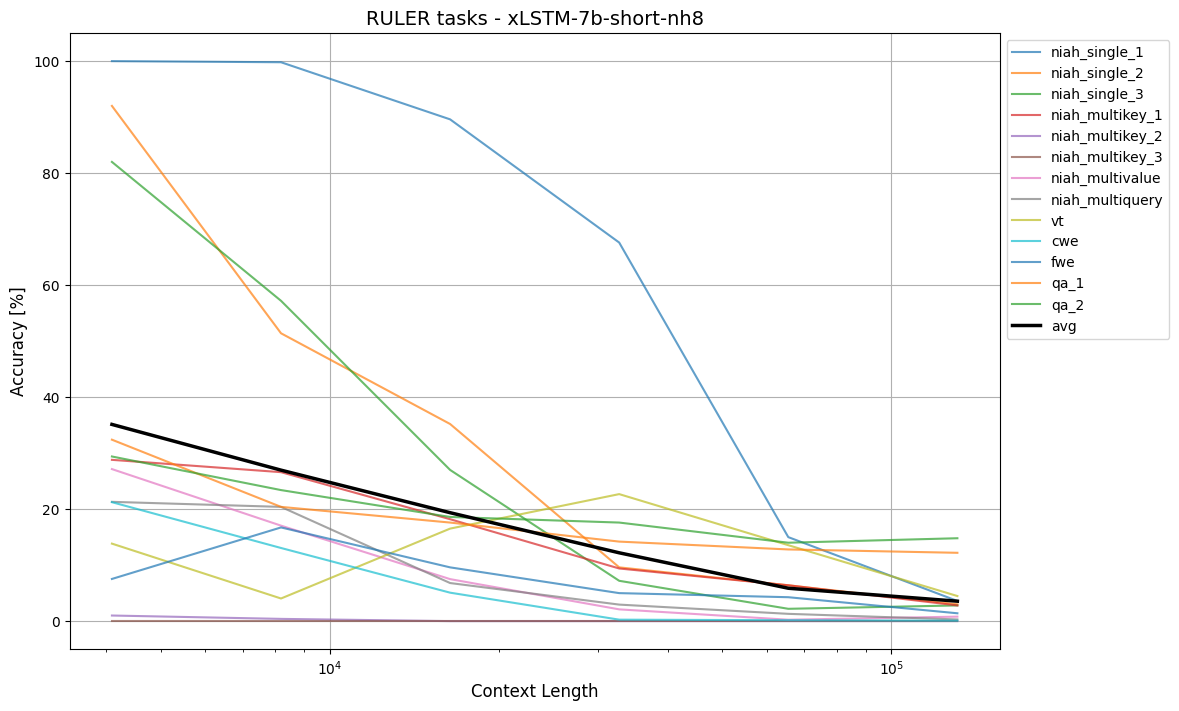

In [30]:
from matplotlib import pyplot as plt
df = joint_data
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot
fix, ax = plt.subplots(figsize=(12, 8))
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        ax.plot(df.index, df[col], label=col, alpha=0.7)

# Plot "avg" with a bold line
ax.plot(df.index, df['avg'], label='avg', linewidth=2.5, color='black')

# Add labels, legend, and grid
ax.set_xlabel('Context Length', fontsize=12)
ax.set_ylabel('Accuracy [%]', fontsize=12)
ax.set_title('RULER tasks - xLSTM-7b-short-nh8', fontsize=14)
ax.set_xscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)


## xLSTN7B short nh 16

### xLSTM-7b-short-nh16

In [31]:
benchmark_dir = Path("./scripts/benchmark_root/xLSTM-7b-short-nh16/synthetic")
name = benchmark_dir.parent.name
ctx_lengths = [x for x in os.listdir(benchmark_dir)]
joint_table = []

for ctx_length in ctx_lengths:
    print(os.listdir(benchmark_dir / ctx_length / "pred" ))
    data = pd.read_csv(benchmark_dir / ctx_length / "pred" / "summary.csv", header=1)
    data["ctx_length"] = int(ctx_length)
    joint_table.append(data)

joint_table[0]

['qa_2.jsonl', 'niah_multiquery.jsonl', 'niah_single_1.jsonl', 'niah_single_3.jsonl', 'niah_multikey_3.jsonl', 'niah_multivalue.jsonl', 'niah_multikey_2.jsonl', 'niah_multikey_1.jsonl', 'niah_single_2.jsonl', 'cwe.jsonl', 'qa_1.jsonl', 'vt.jsonl', 'fwe.jsonl', 'summary.csv', 'submission.csv']
['niah_multiquery.jsonl', 'niah_single_1.jsonl', 'niah_single_3.jsonl', 'niah_single_2.jsonl', 'fwe.jsonl', 'vt.jsonl', 'niah_multikey_3.jsonl', 'niah_multikey_1.jsonl', 'cwe.jsonl', 'qa_1.jsonl', 'niah_multivalue.jsonl', 'qa_2.jsonl', 'niah_multikey_2.jsonl', 'summary.csv', 'submission.csv']
['qa_2.jsonl', 'niah_multikey_2.jsonl', 'vt.jsonl', 'fwe.jsonl', 'niah_multivalue.jsonl', 'niah_multiquery.jsonl', 'cwe.jsonl', 'qa_1.jsonl', 'niah_single_1.jsonl', 'niah_single_3.jsonl', 'niah_multikey_3.jsonl', 'niah_multikey_1.jsonl', 'niah_single_2.jsonl', 'summary.csv', 'submission.csv']
['niah_multikey_3.jsonl', 'niah_single_1.jsonl', 'fwe.jsonl', 'cwe.jsonl', 'qa_2.jsonl', 'qa_1.jsonl', 'niah_multikey_

,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,ctx_length
0,Score,1.6,2.0,2.2,2.4,0.0,0.0,2.2,2.0,0.24,0.18,0.13,10.6,16.8,131072
1,Nulls,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,0/500,131072


In [32]:
joint_data = pd.concat(joint_table)
joint_data = joint_data[joint_data['Tasks'] != "Nulls"]
joint_data = joint_data.set_index("ctx_length")
joint_data_avg = joint_data[[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]]
joint_data_avg = joint_data_avg.values.astype('float32').mean(axis=1)
print(joint_data_avg)
joint_data['avg'] = joint_data_avg
joint_data = joint_data.sort_index()
joint_data

[ 3.103846  3.829231  6.363846 12.411538 23.151537 31.334616]


,Tasks,niah_single_1,niah_single_2,niah_single_3,niah_multikey_1,niah_multikey_2,niah_multikey_3,niah_multivalue,niah_multiquery,vt,cwe,fwe,qa_1,qa_2,avg
ctx_length,,,,,,,,,,,,,,,
4096,Score,95.6,64.2,58.8,18.6,0.4,0.0,27.15,29.5,31.88,15.02,15.4,26.2,24.6,31.334616
8192,Score,61.0,36.0,44.8,17.2,0.0,0.0,24.0,25.4,31.36,8.54,14.87,18.4,19.4,23.151537
16384,Score,10.4,22.6,11.2,16.4,0.0,0.0,10.7,9.2,38.28,3.5,6.87,14.4,17.8,12.411538
32768,Score,4.8,4.2,3.4,6.0,0.0,0.0,4.1,3.6,23.44,0.32,2.67,13.0,17.2,6.363846
65536,Score,3.8,1.8,2.4,2.8,0.0,0.0,2.65,1.8,5.76,0.24,0.53,11.2,16.8,3.829231
131072,Score,1.6,2.0,2.2,2.4,0.0,0.0,2.2,2.0,0.24,0.18,0.13,10.6,16.8,3.103846


In [33]:
[col for col in joint_data.columns if col not in ("ctx_length", "Tasks")]

['niah_single_1',
 'niah_single_2',
 'niah_single_3',
 'niah_multikey_1',
 'niah_multikey_2',
 'niah_multikey_3',
 'niah_multivalue',
 'niah_multiquery',
 'vt',
 'cwe',
 'fwe',
 'qa_1',
 'qa_2',
 'avg']

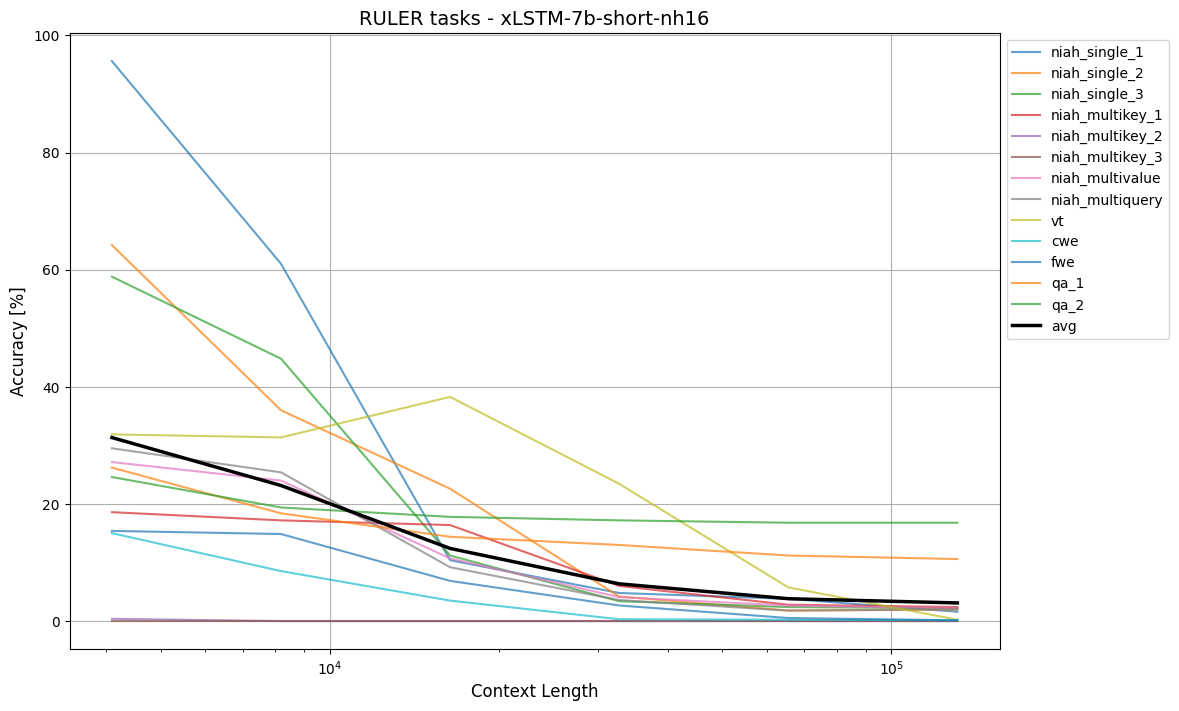

In [34]:
from matplotlib import pyplot as plt
df = joint_data
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot
fix, ax = plt.subplots(figsize=(12, 8))
for col in df.columns:
    if col not in ['Tasks', 'avg']:
        ax.plot(df.index, df[col], label=col, alpha=0.7)

# Plot "avg" with a bold line
ax.plot(df.index, df['avg'], label='avg', linewidth=2.5, color='black')

# Add labels, legend, and grid
ax.set_xlabel('Context Length', fontsize=12)
ax.set_ylabel('Accuracy [%]', fontsize=12)
ax.set_title('RULER tasks - xLSTM-7b-short-nh16', fontsize=14)
ax.set_xscale('log')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)
